In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar xf spark-3.5.1-bin-hadoop3.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [ ]:
import os
df = spark.read.csv('/content/sample_data/california_housing_train.csv', header=True)
df

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000
-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000
-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000
-114.570000,33.570000,20.000000,1454.000000,326.000000,624.000000,262.000000,1.925000,65500.000000
-114.580000,33.630000,29.000000,1387.000000,236.000000,671.000000,239.000000,3.343800,74000.000000
-114.580000,33.610000,25.000000,2907.000000,680.000000,1841.000000,633.000000,2.676800,82400.000000
-114.590000,34.830000,41.000000,812.000000,168.000000,375.000000,158.000000,1.708300,48500.000000
-114.590000,33.610000,34.000000,4789.000000,1175.000000,3134.000000,1056.000000,2.178200,58400.000000
-114.600000,34.830000,46.000000,1497.000000,309.000000,787.000000,271.000000,2.190800,48100.000000


In [ ]:
df.dtypes

[('longitude', 'string'),
 ('latitude', 'string'),
 ('housing_median_age', 'string'),
 ('total_rooms', 'string'),
 ('total_bedrooms', 'string'),
 ('population', 'string'),
 ('households', 'string'),
 ('median_income', 'string'),
 ('median_house_value', 'string')]

In [ ]:
from pyspark.sql.functions import col
df = df.withColumn("longitude", col("longitude").cast("double"))
df = df.withColumn("latitude", col("latitude").cast("double"))
df = df.withColumn("housing_median_age", col("housing_median_age").cast("double"))
df = df.withColumn("total_rooms", col("total_rooms").cast("double"))
df = df.withColumn("total_bedrooms", col("total_bedrooms").cast("double"))
df = df.withColumn("population", col("population").cast("double"))
df = df.withColumn("households", col("households").cast("double"))
df = df.withColumn("median_income", col("median_income").cast("double"))
df = df.withColumn("median_house_value", col("median_house_value").cast("double"))
df.dtypes

[('longitude', 'double'),
 ('latitude', 'double'),
 ('housing_median_age', 'double'),
 ('total_rooms', 'double'),
 ('total_bedrooms', 'double'),
 ('population', 'double'),
 ('households', 'double'),
 ('median_income', 'double'),
 ('median_house_value', 'double')]

In [ ]:
df.limit(10)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
-114.47,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.82,80100.0
-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.925,65500.0
-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
-114.6,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [ ]:
from pyspark.sql.functions import col, isnan, when, count
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|        0|       0|                 0|          0|             0|         0|         0|            0|                 0|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+



In [ ]:
df.describe()

summary,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000,17000,17000,17000,17000,17000,17000,17000,17000
mean,-119.56210823529375,35.6252247058827,28.58935294117647,2643.664411764706,539.4108235294118,1429.5739411764705,501.2219411764706,3.883578100000021,207300.91235294117
stddev,2.0051664084260357,2.1373397946570867,12.586936981660406,2179.947071452777,421.4994515798648,1147.852959159527,384.5208408559016,1.9081565183791036,115983.76438720895
min,-124.35,32.54,1.0,2.0,1.0,3.0,1.0,0.4999,14999.0
max,-114.31,41.95,52.0,37937.0,6445.0,35682.0,6082.0,15.0001,500001.0


# Data visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

dfp = df.toPandas()
dfp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# sns.pairplot(df_pandas)

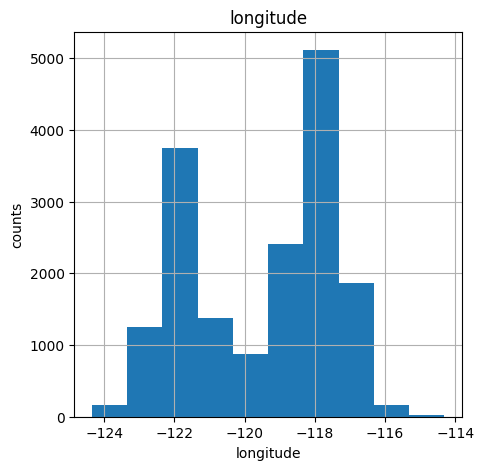

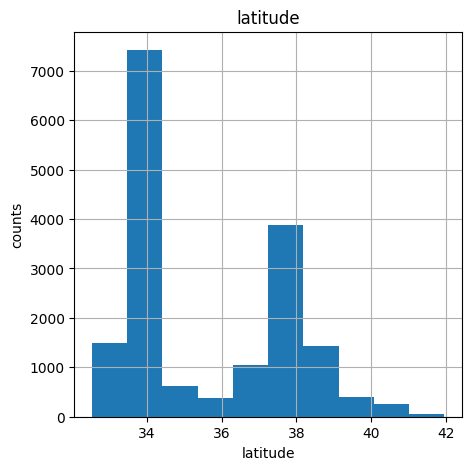

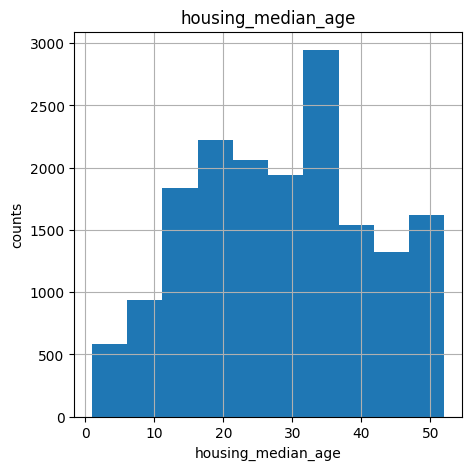

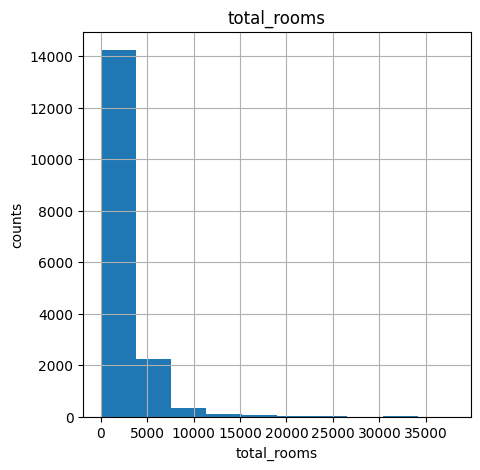

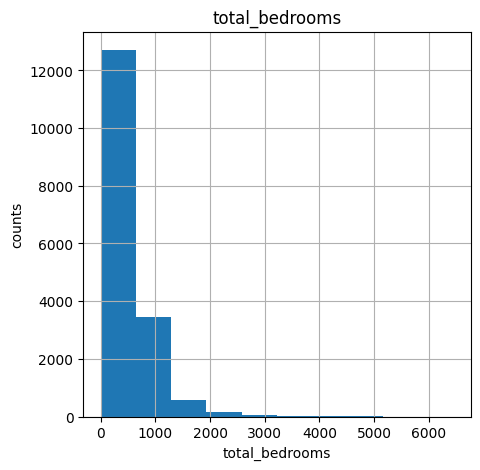

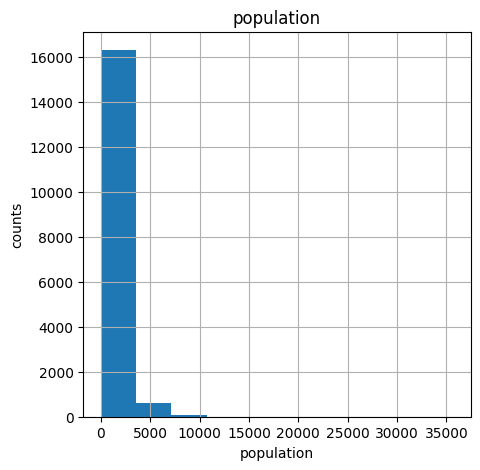

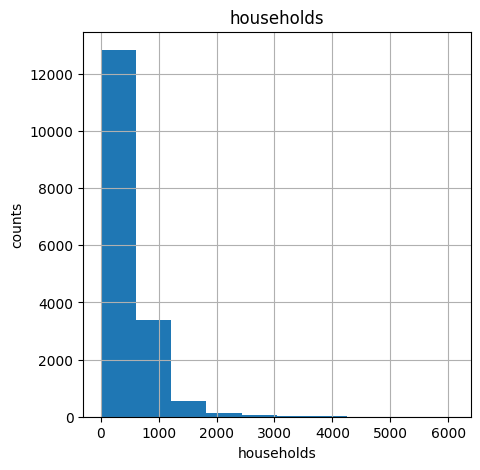

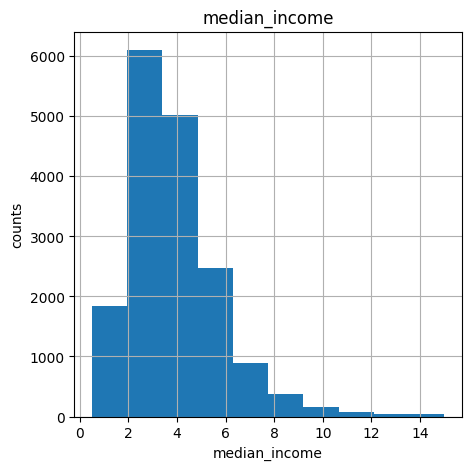

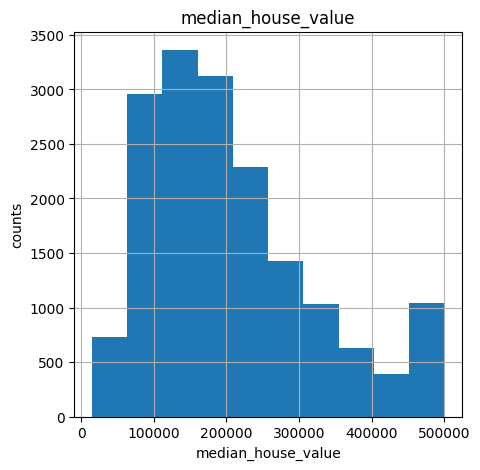

In [ ]:
for col in dfp.columns:
  fig = plt.figure(figsize=(5, 5))
  dfp[col].hist()
  plt.xlabel(col)
  plt.ylabel("counts")
  plt.title(col)
  plt.show()

<Axes: >

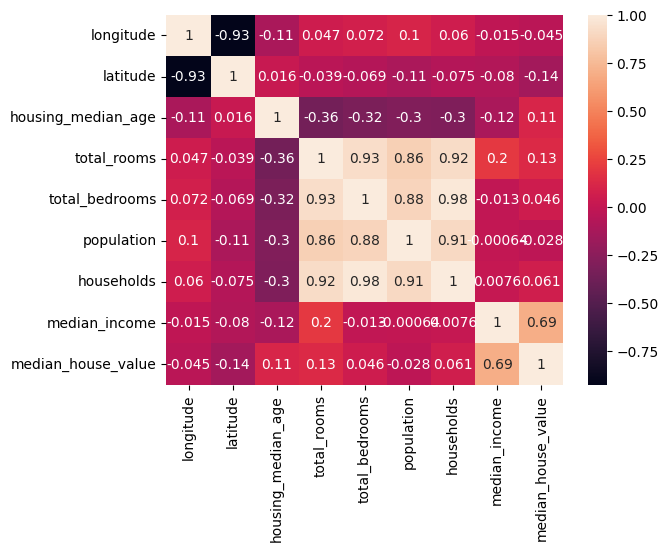

In [ ]:
sns.heatmap(dfp.corr(), annot=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
def vif(df):
  cols = df.columns[:-1]
  X = dfp[cols]
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns

  vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

  # print(vif_data)

  return vif_data[vif_data["VIF"] > 10]["feature"].tolist()

print(vif(df))

['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'households']


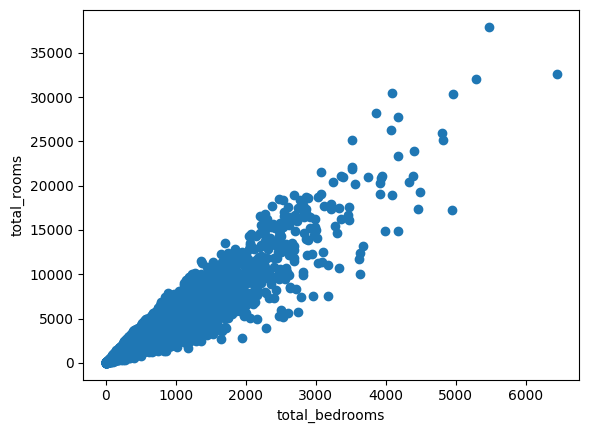

In [ ]:
colx = "total_bedrooms"
coly = "total_rooms"
plt.scatter(dfp[colx], dfp[coly])
plt.xlabel(colx)
plt.ylabel(coly)
plt.show()

# Linear Regression Baseline

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler, PCA
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
# prepare dataframe
def data_prep(df):
  feature_cols = ["longitude", "latitude", "housing_median_age", "total_rooms",
                  "total_bedrooms", "population", "households", "median_income"]

  # Create feature vector
  assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
  df_train = assembler.transform(df)
  return df_train

In [ ]:
from pyspark.ml.feature import StandardScaler, Normalizer

def preprocessing(df):
  df2 = spark.createDataFrame(df.rdd.map(lambda x: x), schema=df.schema)

  cols = df2.columns

  # scaler = StandardScaler(inputCol="features", outputCol="t_features", withStd=True, withMean=True)
  # model = scaler.fit(df)
  # df = model.transform(df)

  # pca = PCA(k=2, inputCol="features", outputCol="pca_features")
  # model = pca.fit(df2)
  # pca_df = model.transform(df2)


  return df2

In [ ]:
def train_test_split_df(df, train_size=0.8, test_size=0.2, rseed=42):
  # train test split
  train_data, test_data = df.randomSplit([train_size, test_size], seed = rseed)

  return train_data, test_data

In [ ]:
  # # Cross Validation
# def cross_validation(lr, train_data):
#   paramGrid = ParamGridBuilder().addGrid(lr.regParam, [0.1, 0.01]).build()

#   cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=r2_evaluator, numFolds = 3)
#   cv_model = cv.fit(train_data)

#   # Evaluation cross-validated model
#   cv_predictions = cv_model.transform(test_data)
#   cv_rmse = evaluator.evaluate(cv_predictions)
#   print(f"Cross-Validated RMSE: {cv_rmse}")

In [ ]:
def eval_lr(predictions):
   # Evaluation
  evaluator = RegressionEvaluator(labelCol="median_house_value", predictionCol="prediction", metricName="rmse")
  rmse = evaluator.evaluate(predictions)

  # R2
  r2_evaluator = RegressionEvaluator(labelCol = "median_house_value", predictionCol="prediction", metricName="r2")
  r2 = r2_evaluator.evaluate(predictions)

  print(f"RMSE: {rmse}")
  print(f"R2 Score: {r2}")

In [ ]:
def train_lr(train_data, test_data, features="features"):
    # model instanciation
  lr = LinearRegression(featuresCol=features, labelCol="median_house_value", regParam = 0.2, elasticNetParam =1.0)
  model = lr.fit(train_data)

  # predict
  predictions = model.transform(test_data)

  predictions.select("median_house_value", "prediction").show(10)

  return predictions

In [ ]:
df2 = data_prep(df)
df2.select("features", "median_house_value").show(1, truncate=False)
df2 = preprocessing(df2)
df2.select("features", "t_features", "median_house_value").show(1, truncate=False)

+------------------------------------------------------+------------------+
|features                                              |median_house_value|
+------------------------------------------------------+------------------+
|[-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936]|66900.0           |
+------------------------------------------------------+------------------+
only showing top 1 row



AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `t_features` cannot be resolved. Did you mean one of the following? [`features`, `latitude`, `longitude`, `population`, `total_rooms`].;
'Project [features#1662, 't_features, median_house_value#1661]
+- LogicalRDD [longitude#1653, latitude#1654, housing_median_age#1655, total_rooms#1656, total_bedrooms#1657, population#1658, households#1659, median_income#1660, median_house_value#1661, features#1662], false


In [ ]:
train_data, test_data = train_test_split_df(df2)


predictions = train_lr(train_data, test_data, "t_features")
eval_lr(predictions)